In [1]:
import umap
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import os
cur_dir = os.getcwd()
print(cur_dir)

E:\python\2024.12.01\ContraVis_next


In [4]:
raw_data = np.load(r"E:\python\2024.12.01\ContraVis_next\dataset\cifar_resnet_none\features.npy")
labels = np.load(r"E:\python\2024.12.01\ContraVis_next\dataset\cifar_resnet_none\labels.npy")

In [36]:
pattern_type = "stripes"
intensity = 0.3
noisy_data = np.load(rf"E:\python\2024.12.01\ContraVis_next\dataset\cifar_resnet_{pattern_type}_{intensity}\features.npy")

In [26]:
relation_dict = {k:k for k in range(raw_data.shape[0])}
relation_dicts = [relation_dict]

In [37]:
from umap import AlignedUMAP
aligned_umap_mapper = AlignedUMAP().fit(X = [raw_data,noisy_data],relations=relation_dicts)

In [28]:
def axis_bounds(embedding):
    left, right = embedding.T[0].min(), embedding.T[0].max()
    bottom, top = embedding.T[1].min(), embedding.T[1].max()
    adj_h, adj_v = (right - left) * 0.1, (top - bottom) * 0.1
    return [left - adj_h, right + adj_h, bottom - adj_v, top + adj_v]

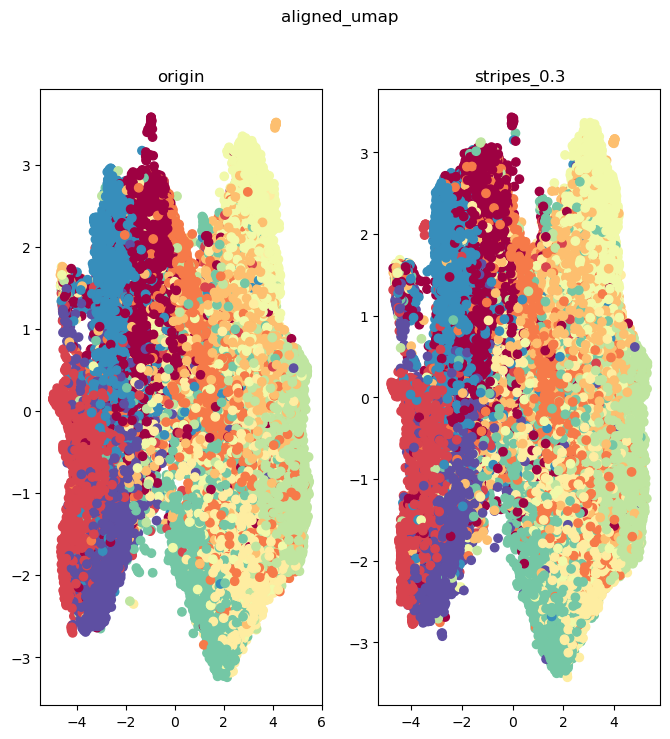

In [38]:
fig,axs = plt.subplots(nrows = 1, ncols = 2, figsize = (8,8))
for i,ax in enumerate(axs):
    ax.scatter(*aligned_umap_mapper.embeddings_[i].T,c=labels,cmap="Spectral")
    ax.set_title(f"{pattern_type}_{intensity}"  if i!=0 else "origin")
fig.suptitle("aligned_umap")
save_dir = os.path.join("results/aligned_umap/cifar_resnet")
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
save_path = os.path.join(save_dir, f"{pattern_type}_{intensity}.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')  # 保存为 PNG，分辨率 300 dpi